In [1]:
cd D:\College\Graduation\DL_Tasks\NLP_Task

D:\College\Graduation\DL_Tasks\NLP_Task


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
data = pd.read_csv('TwitterSentiments.csv')
data = data.iloc[:,1:]
X=data.tweet
Y=data.label
X

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31957    ate @user isz that youuu?ðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960    @user #sikh #temple vandalised in in #calgary,...
31961                     thank you @user for you follow  
Name: tweet, Length: 31962, dtype: object

In [4]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
31957    0
31958    0
31959    0
31960    1
31961    0
Name: label, Length: 31962, dtype: int64

In [5]:
data.info

<bound method DataFrame.info of        label                                              tweet
0          0   @user when a father is dysfunctional and is s...
1          0  @user @user thanks for #lyft credit i can't us...
2          0                                bihday your majesty
3          0  #model   i love u take with u all the time in ...
4          0             factsguide: society now    #motivation
...      ...                                                ...
31957      0  ate @user isz that youuu?ðððððð...
31958      0    to see nina turner on the airwaves trying to...
31959      0  listening to sad songs on a monday morning otw...
31960      1  @user #sikh #temple vandalised in in #calgary,...
31961      0                   thank you @user for you follow  

[31962 rows x 2 columns]>

In [6]:
Y.value_counts()

label
0    29720
1     2242
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

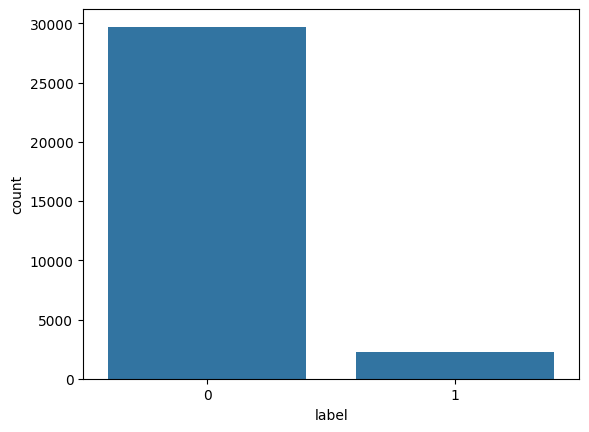

In [7]:
sns.countplot(x= Y)

In [8]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Print the original class distribution
print("Original class distribution:", Counter(Y))

under_sampler = RandomUnderSampler(random_state=42)
X_resampled, Y_resampled = under_sampler.fit_resample(np.array(X).reshape(-1, 1), Y)
print("Resampled class distribution:", Counter(Y_resampled))

# Convert resampled features back to list of strings
X_resampled = X_resampled.ravel()

Original class distribution: Counter({0: 29720, 1: 2242})
Resampled class distribution: Counter({0: 2242, 1: 2242})


<Axes: xlabel='label', ylabel='count'>

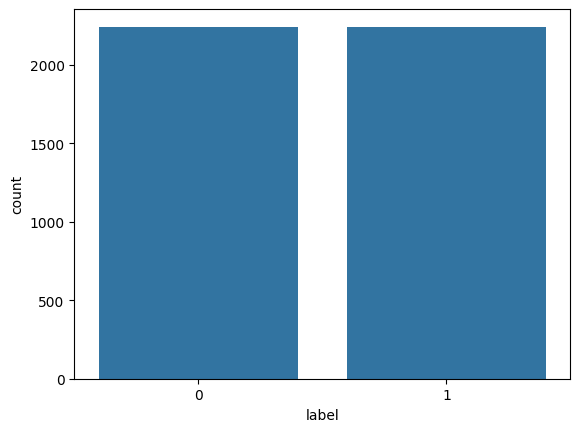

In [9]:
sns.countplot(x= Y_resampled)

In [10]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
st = stopwords.words('english')
st

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\A0155\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [11]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\A0155\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [12]:
import re

X_train = []
Y_train = Y_resampled
for tweet in X_resampled:
    tweet = re.sub('[^A-z]',' ',tweet) 
    tweet = tweet.lower()
    tweet = tweet.split()
    tweet = [word for word in tweet if word not in st]
    tweet = ' '.join(tweet)
    tweet = lemmatizer.lemmatize(tweet)
    X_train.append(tweet)

In [13]:
X_train

['body body massage ending oil massage body happyending massage center abu dhabi',
 'user call back casting castingcall model cute toddler toddlerlife photooftheday nofilter family htt',
 'help creates environment togetherness amp mutualrespect prerequisites sustainable healthy society fridayfeeling',
 'summer friend summer friend life vlog weeknd crazy miss',
 'follow snapchat awesomecutenes snapchat selfie sad love bff yaaaaasss',
 'user robbie told user thesmb lead asked broadcast user blessed spats',
 'cupcakes beachpay payplanning friends enough justwannabeme',
 'happy boy love guy littleman loveofmylife littlebuddy smile bestbuddy',
 'keshi news really hard accept sosudden',
 'days porn movie skinny amateur sex',
 'greatest gift life friendship received friendship girls',
 'months ago thought could live size glad kept going fitness cleanliving',
 'user arr look taylor slide sister x',
 'hobi face looks like omg disgusting experience',
 'bubbling energy user amp new faces powerofu

In [14]:
Y_train

0       0
1       0
2       0
3       0
4       0
       ..
4479    1
4480    1
4481    1
4482    1
4483    1
Name: label, Length: 4484, dtype: int64

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_train_vecorizaion = cv.fit_transform(X_train).toarray()

In [16]:
X_train_vecorizaion

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [17]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tf_idf = tfidf_transformer.fit_transform(X_train_vecorizaion).toarray()

In [18]:
X_train_tf_idf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [19]:
vectorizer1_2 = CountVectorizer(
    lowercase=True,                  # Converts all characters to lowercase before tokenization.
    tokenizer=None,                  # the default tokenizer will be used.
    stop_words=None,                 # You can provide a list of stop words or use 'english' to remove common English stop words.
    max_features=10211,              # all tokens will be included.
    ngram_range=(1, 2),              # Use unigrams (1 word)
    vocabulary=None,                 # a vocabulary will be created from the input documents.
    binary=False                     # If False, the count of occurrences of each token is recorded; if True, only presence/absence is recorded.
)

# Transform the text data into a document-term matrix
X_train_n12 = vectorizer1_2.fit_transform(X_train).toarray()

In [20]:
X_train_n12

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [21]:
vectorizer2_2 = CountVectorizer(
    lowercase=True,                  # Converts all characters to lowercase before tokenization.
    tokenizer=None,                  # the default tokenizer will be used.
    stop_words=None,                 # You can provide a list of stop words or use 'english' to remove common English stop words.
    max_features=10211,              # all tokens will be included.
    ngram_range=(2, 2),              # Use unigrams (1 word)
    vocabulary=None,                 # a vocabulary will be created from the input documents.
    binary=False                     # If False, the count of occurrences of each token is recorded; if True, only presence/absence is recorded.
)

# Transform the text data into a document-term matrix
X_train_n22 = vectorizer2_2.fit_transform(X_train).toarray()

In [22]:
X_train_n22

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [23]:
vectorizer3_3 = CountVectorizer(
    lowercase=True,                  # Converts all characters to lowercase before tokenization.
    tokenizer=None,                  # the default tokenizer will be used.
    stop_words=None,                 # You can provide a list of stop words or use 'english' to remove common English stop words.
    max_features=10211,              # all tokens will be included.
    ngram_range=(3, 3),              # Use unigrams (1 word)
    vocabulary=None,                 # a vocabulary will be created from the input documents.
    binary=False                     # If False, the count of occurrences of each token is recorded; if True, only presence/absence is recorded.
)

# Transform the text data into a document-term matrix
X_train_n33 = vectorizer3_3.fit_transform(X_train).toarray()

In [24]:
X_train_n33

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [26]:
x_train_v,x_test_v,y_train_v,y_test_v = train_test_split(X_train_vecorizaion,Y_train,test_size=0.2,random_state=45)

In [27]:
x_train_tfidf,x_test_tfidf,y_train_tfidf,y_test_tfidf = train_test_split(X_train_tf_idf,Y_train,test_size=0.2,random_state=45)

In [28]:
x_train_n12,x_test_n12,y_train_n12,y_test_n12 = train_test_split(X_train_n12,Y_train,test_size=0.2,random_state=45)

In [29]:
x_train_n22,x_test_n22,y_train_n22,y_test_n22 = train_test_split(X_train_n22,Y_train,test_size=0.2,random_state=45)

In [30]:
x_train_n33,x_test_n33,y_train_n33,y_test_n33 = train_test_split(X_train_n33,Y_train,test_size=0.2,random_state=45)

In [31]:
model_xgb = xgb.XGBClassifier(n_estimators=930, learning_rate=0.1, max_depth=8)
model_xgb.fit(x_train_v,y_train_v)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=930, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [49]:
y_pred_xgb_v = model_xgb.predict(x_test_v)
accuracy_score(y_pred_xgb_v,y_test_v)

# temp3 = model_xgb.predict(x_train_v)
# accuracy_score(temp3 , y_train_v)

0.9261221076108168

In [33]:
model_v = MultinomialNB()
model_v.fit(x_train_v,y_train_v)

MultinomialNB()

In [34]:
y_pred_v = model_v.predict(x_test_v)
accuracy_score(y_pred_v,y_test_v)

0.8695652173913043

In [35]:
model_tfidf = MultinomialNB()
model_tfidf.fit(x_train_tfidf,y_train_tfidf)

MultinomialNB()

In [47]:
y_pred_tfidf = model_tfidf.predict(x_test_tfidf)
accuracy_score(y_pred_tfidf,y_test_tfidf)

temp=model_tfidf.predict(x_train_tfidf)
accuracy_score(temp,y_train_tfidf)

0.9707276275439085

In [37]:
model_n12 = MultinomialNB()
model_n12.fit(x_train_n12,y_train_n12)

MultinomialNB()

In [48]:
y_pred_n12 = model_n12.predict(x_test_n12)
accuracy_score(y_pred_n12,y_test_n12)

temp2 = model_n12.predict(x_train_n12)
accuracy_score(temp2,y_train_n12)

0.9548369110677446

In [39]:
model_n22 = MultinomialNB()
model_n22.fit(x_train_n22,y_train_n22)

MultinomialNB()

In [40]:
y_pred_n22 = model_n22.predict(x_test_n22)  
accuracy_score(y_pred_n22,y_test_n22)                                                         

0.7391304347826086

In [41]:
model_n33 = MultinomialNB()
model_n33.fit(x_train_n33,y_train_n33)

MultinomialNB()

In [42]:
y_pred_n33 = model_n33.predict(x_test_n33)
accuracy_score(y_pred_n33,y_test_n33)

0.6700111482720178

In [43]:
svc_n22 = SVC(kernel='rbf')
svc_n22.fit(x_train_n22,y_train_n22)

SVC()

In [44]:
y_pred_svc_n22 = svc_n22.predict(x_test_n22)
accuracy_score(y_pred_svc_n22,y_test_n22)

0.7279821627647715

In [45]:
svc_n33 = SVC(kernel='rbf')
svc_n33.fit(x_train_n33,y_train_n33)

SVC()

In [46]:
y_pred_svc_n33 = svc_n33.predict(x_test_n33)
accuracy_score(y_pred_svc_n33,y_test_n33)

0.6845039018952063